In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [4]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

our train data has no missing values 

In [5]:
test = pd.read_csv('Test.csv')

In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

test data is also free from any missing values

In [8]:
test.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [9]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

hence i can conclude that count is my target variable

In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [11]:
train.value_counts()


datetime             season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count
2011-01-01 0:00:00   1       0        0           1        9.84   14.395  81.0      0.0000     3       13          16       1
2012-01-01 20:00:00  1       0        0           2        18.04  21.970  62.0      19.9995    25      58          83       1
2012-01-01 11:00:00  1       0        0           1        13.94  16.665  76.0      8.9981     40      98          138      1
2012-01-01 12:00:00  1       0        0           1        16.40  20.455  62.0      19.0012    58      143         201      1
2012-01-01 13:00:00  1       0        0           1        17.22  21.210  58.0      19.0012    82      141         223      1
                                                                                                                           ..
2011-07-04 16:00:00  3       1        0           1        33.62  37.120  41.0      0.0000     236     216         452     

<AxesSubplot:ylabel='Frequency'>

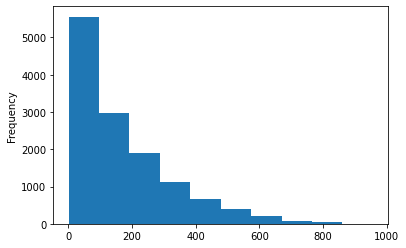

In [12]:
train['count'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

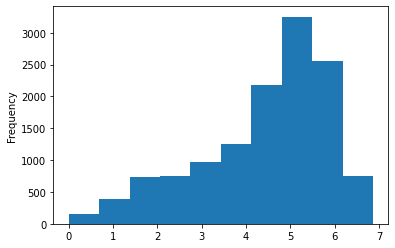

In [13]:
np.log(train['count']).plot.hist()


taking log was to make the distribution less skewed

<AxesSubplot:ylabel='Frequency'>

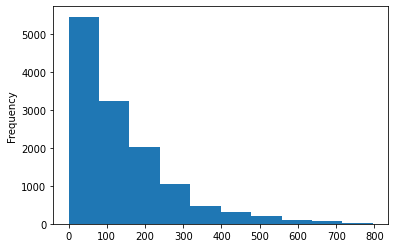

In [14]:
train['registered'].plot.hist()

we can see that the most of the registered users fall under 0 to 200

In [15]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

since there date-time is in object form, we have to convert it into a readable form

In [16]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [17]:
train['datetime'].dtype

dtype('<M8[ns]')

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


although datetime was converted we still wish to create separate columns for it

In [19]:
train['hour'] = train['datetime'].dt.hour
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,4,1,2011


we have to do the same thing for the test data set

In [21]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [22]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [23]:
test['hours'] = test['datetime'].dt.hour
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year

In [24]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hours,month,year
0,2012-06-30 01:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,1,6,2012
1,2012-06-30 02:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2,6,2012
2,2012-06-30 03:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,3,6,2012
3,2012-06-30 04:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,4,6,2012
4,2012-06-30 05:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,5,6,2012


# bivariate analysis

In [25]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

<AxesSubplot:>

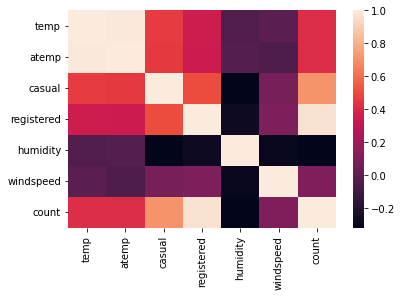

In [26]:
import seaborn as sn

sn.heatmap(corr)

from this graph we can infer that the count function has a little dependency on "temp" and "atemp" where as little to no correlation between humidity and count

we will now convert our train data set to 2 different sets so we can predict and score our data for the train data set_asyncgen_hooks

In [27]:
train_train = train[train['datetime']<='2012-03-30 0:00:00']
train_test = train[train['datetime']>'2012-03-30 0:00:00']

since datetime value has already been extracted we can drop it along with the atemp value, since it is highly correlated to temp values

In [28]:
train_test = train_test.drop(['datetime','atemp'],axis=1)
train_train = train_train.drop(['datetime','atemp'],axis=1)
train = train.drop(['datetime','atemp'],axis=1)
test = test.drop(['datetime','atemp'],axis=1)

since now our data is all complete we can go ahead and build the model - in this case Linear Regression since our target variable is continous

In [29]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [30]:
x_train = train_train.drop('count',axis=1)
y_train = train_train['count']
x_eval = train_test.drop('count',axis=1)
value_eval = train_test['count']

In [31]:
x_train.shape , y_train.shape , x_eval.shape, value_eval.shape


((10774, 12), (10774,), (2206, 12), (2206,))

In [32]:
lreg.fit(x_train,y_train)

LinearRegression()

In [33]:
pred = lreg.predict(x_eval)

In [34]:
pred

array([ 27.,   7.,   7., ..., 163.,  48.,  69.])

In [35]:
lreg.score(x_eval,value_eval)

1.0

In [36]:
lreg.score(x_train,y_train)

1.0

In [37]:
def rmsle(x, y):
    x = np.exp(x),   # taking the exponential as we took the log of target variable
    y = np.exp(y)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in x]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

rmsle(value_eval,pred)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Acer\AppData\Local\Temp\ipykernel_3732\1705844979.py:3: RuntimeWarning: overflow encountered in exp
  y = np.exp(y)


2.475843824451373e-13

we got 2.475843824451373e-13 on the validation set, thus trying it on the test data set

In [38]:
final_pred = lreg.predict(test)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- hours
Feature names seen at fit time, yet now missing:
- hour

  warnings.warn(message, FutureWarning)


In [39]:
final_pred

array([58., 61., 23., ..., 90., 61., 49.])

In [40]:
submission = pd.DataFrame()
submission['count'] = final_pred

In [41]:
submission.head()

,count
0,58.0
1,61.0
2,23.0
3,18.0
4,10.0


In [42]:
submission.to_csv('submission.csv')